# PCA on the Features extracted with VGGISH 

## Load the data

In [16]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import QuantileTransformer

# load data
data = pd.read_csv('vggish_features.csv')
X = data.drop(['genre', "song"], axis=1)
Y_string = data['genre']

# turn genres into numbers
genre_to_num = {'blues': 0,
                 'classical': 1,
                   'country': 2, 
                   'disco': 3, 
                   'hiphop': 4, 
                   'jazz': 5, 
                   'metal': 6, 'pop': 7, 
                   'reggae': 8, 'rock': 9}
num_to_genre = {0: 'blues', 1: 'classical', 2: 'country', 3: 'disco', 4: 'hiphop', 5: 'jazz', 6: 'metal', 7: 'pop', 8: 'reggae', 9: 'rock'}
Y_int = Y_string.map(genre_to_num)

# normalize data
X = (X - X.mean()) / X.std()

# fix skewness
qt = QuantileTransformer()
X = qt.fit_transform(X)

c:\Users\dario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (999). n_quantiles is set to n_samples.
  warnings.warn(


In [11]:
from sklearn.decomposition import PCA

def get_pca(X, y, num_components):
    pca = PCA(n_components=num_components)
    pca.fit(X)
    transformed_data = pca.transform(X)
    return transformed_data

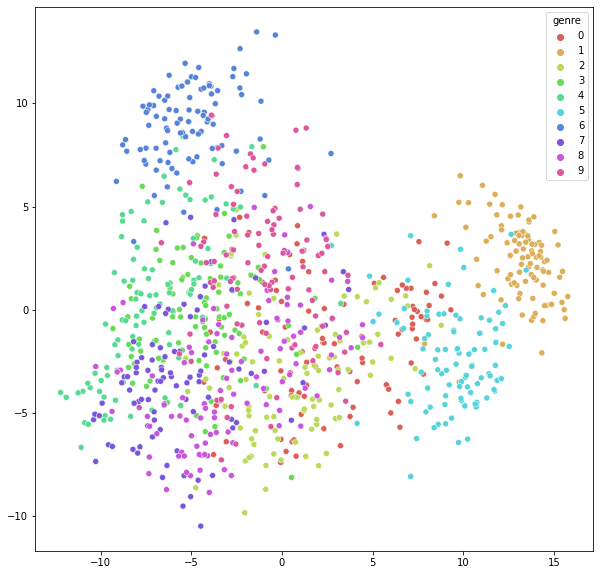

In [13]:
# Do 2d PCA
X_2d = get_pca(X, Y, 2)

# plot 2d PCA
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 10))
sns.scatterplot(x=X_2d[:, 0], y=X_2d[:, 1], hue=Y, palette=sns.color_palette("hls", 10))
plt.show()


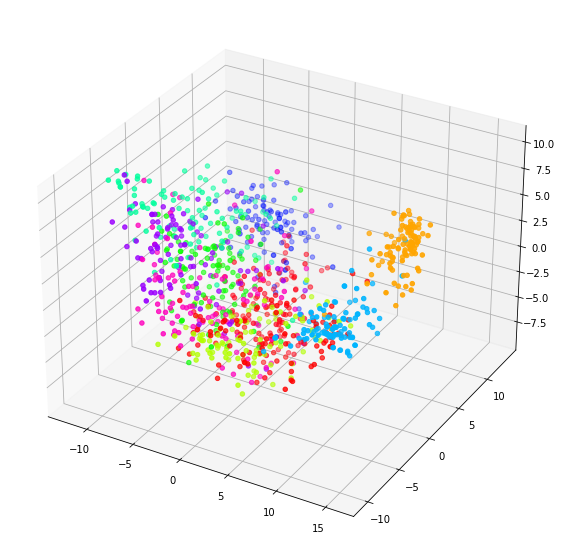

In [4]:
# 3d PCA
X_3d = get_pca(X, Y, 3)

# plot 3d PCA
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_3d[:, 0], X_3d[:, 1], X_3d[:, 2], c=Y, cmap='hsv')
plt.show()

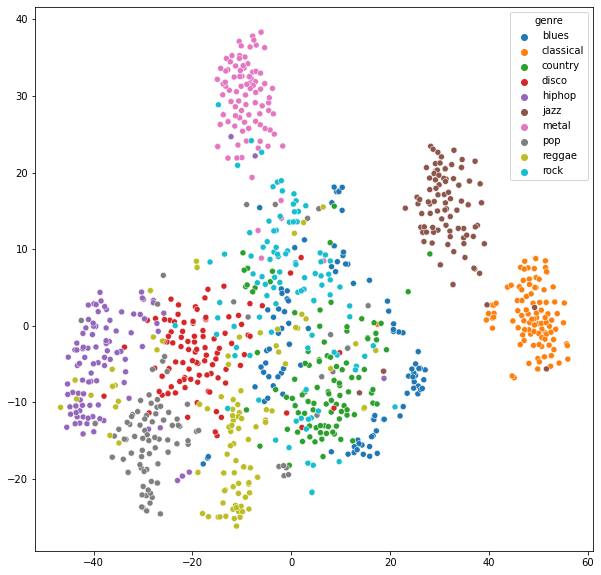

In [17]:
# tsne 2d
from sklearn.manifold import TSNE

X_tsne = TSNE(n_components=2).fit_transform(X)

# plot tsne 2d
plt.figure(figsize=(10, 10))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=Y_string, palette=sns.color_palette("tab10", 10))
plt.show()

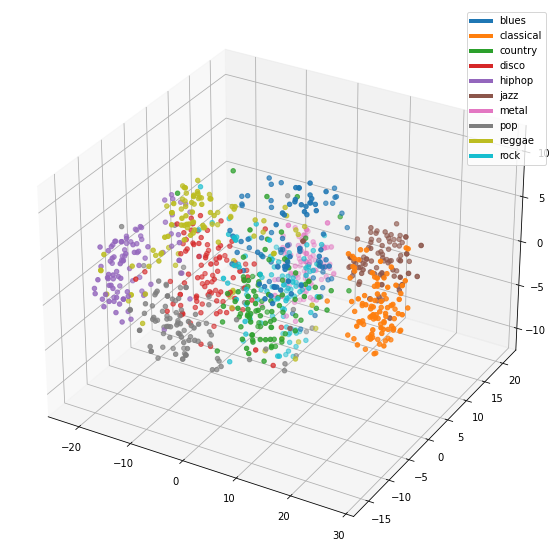

In [19]:
# tsne 3d
X_tsne = TSNE(n_components=3).fit_transform(X)

# plot tsne 3d
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2], c=Y_int, cmap='tab10')

# add color legend
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='tab:blue', lw=4),
                Line2D([0], [0], color='tab:orange', lw=4),
                Line2D([0], [0], color='tab:green', lw=4),
                Line2D([0], [0], color='tab:red', lw=4),
                Line2D([0], [0], color='tab:purple', lw=4),
                Line2D([0], [0], color='tab:brown', lw=4),
                Line2D([0], [0], color='tab:pink', lw=4),
                Line2D([0], [0], color='tab:gray', lw=4),
                Line2D([0], [0], color='tab:olive', lw=4),
                Line2D([0], [0], color='tab:cyan', lw=4)]
ax.legend(custom_lines, ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock'])

plt.show()